# <center> **HW 3 Part 3** </center>
# <center> **Classification Comparison** </center>

<br> <br>

### <center> Author: Omar Gabr <center> 

# **Objective**

This notebook aims to evaluate the performance of 6 machine learning classification algorithms using 4 different synthetic datasets, each with 2-dimensional inputs representing 2 distinct classes. The datasets will be generated using three synthetic functions from the sklearn.datasets module: (1) [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs), (2) [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles), (3) [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons).
<br> <br>

Classification Algorithms:
1. Naive Bayes Classification
2. Logistic Regression
3. Quadratic Discriminant Analysis
4. SVM via RBF
5. Decision Tree
6. KNN where k=1

# **Synthesizing the Dataset**

Prior to synthesis, I will describe the characteristics of each of the 4 datasets with 100 samples each.
1. **blob_classes**: Two well-separated blob classes to display near-perfect accuracy for all 6 algorithms.
2. **circle_classes**: Nonlinear separable classes that produce circular boundaries. This should perform well on KNN, SVM, and decision trees, while it struggles with logistic regression.
3. **moons_classes**: Overlapping regions to leverage QDA over KNN and decision trees. I expect logistic regression to perform poorly as well compared to others.
4. **nl_blob_classes**: Similar to **blob_classes**, but with a nonlinear boundary with clear clusters. Performs well with KNN and SVM.



In [ ]:
### Modules Used For Data Synthesis ###
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import warnings
warnings.filterwarnings("ignore")

n_samples=100
n_features=2
cmap = ListedColormap(['red', 'blue'])

These modules will be used to synthesize the 4 datasets, with specific parameters that will be passed to each of the 3 sklearn.datasets functions. Each dataset will contain 200 samples, where each class will contain exactly 100 samples. Since the dataset will be 2D, then we expect only 2 features/classes. Finally, the cmap variable will assign red for class 1 and blue for class 2.

## <center> blob_classes </center>

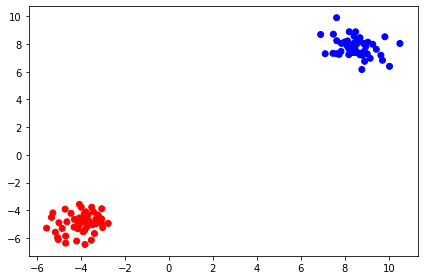

In [ ]:
# implementing make_blobs function to create a 2D dataset
std_features=np.array([1.0 / np.sqrt(n_features)] * n_features)
blob_classes = datasets.make_blobs(n_samples=n_samples, n_features=n_features, centers=2, cluster_std=std_features, random_state=49)

# initializing classes and labels
blob_1 = blob_classes[0][:, 0]    # x coordinates
blob_2 = blob_classes[0][:, 1]    # y coordinates
blob_labels = blob_classes[1]

plt.scatter(blob_1, blob_2, c=blob_labels, cmap=cmap)
plt.tight_layout()
plt.show()

The make_blobs function returns a tuple of the 2 features we passed in each as arrays, so I extract each array from the tuple and assign it to separate classes respectively. The *std_feature* variable stores the standard deviation of the number of features to ensure that the functions generate a dataset with equal number of samples.
<br>
Now, a scatterplot will provide a simple visualization of these two well-separated clusters. This dataset should perform perfectly for all of the 6 classification algorithms that will be looked at later.

## <center> circle_classes </center>

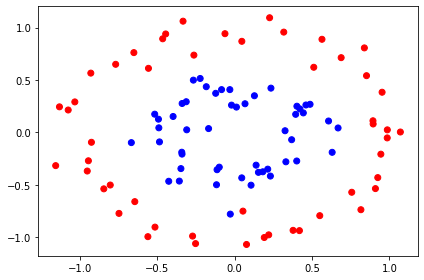

In [ ]:
# implementing a make_circles function
# add noise and factors levels to make logistic regression perform poorly to others
circle_classes = datasets.make_circles(n_samples=n_samples, factor=0.4, noise=0.1, random_state=50)

# initializing classes and labels
circle_1 = circle_classes[0][:, 0]    # x coordinates
circle_2 = circle_classes[0][:, 1]    # y coordinates
circle_labels = circle_classes[1]

plt.scatter(circle_1, circle_2, c=circle_labels, cmap=cmap)
plt.tight_layout()
plt.show()

Using the make_circles function, I extracted the data from the tuple, then classified the data into the inner and outer circle by converting from cartesian to polar form, and deciding by the length of the radius. Finally, I put these classified data into a new np array to use as the color map for the scatter plot. This should display two concentric circles, each representing a distinc class. This should perform well on nonlinearly separable algorithms.

## <center> moons_classes </center>

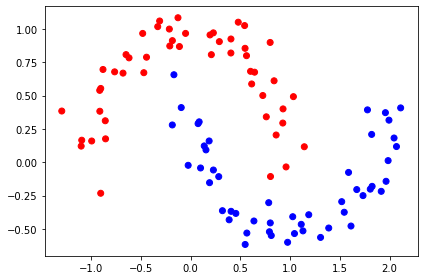

In [ ]:
# implementing a make_moons function
# noise is added enough to make KNN and decision trees overfit
moons_classes = datasets.make_moons(n_samples=n_samples, noise=0.1, random_state=51)

# initializing classes and labels
moon_1 = moons_classes[0][:, 0]    # x coordinates
moon_2 = moons_classes[0][:, 1]    # y coordinates
moons_labels = moons_classes[1]

plt.scatter(moon_1, moon_2, c=moons_labels, cmap=cmap)
plt.tight_layout()
plt.show()

With the make_moons functions, there are two crescent moons that exhibit a pattern with a nonlinear boundary. The logistic regression model should perform poorly, and QDA should perform a lot better than decision trees, SVM, and KNN.

## <center> nl_blob_classes </center>

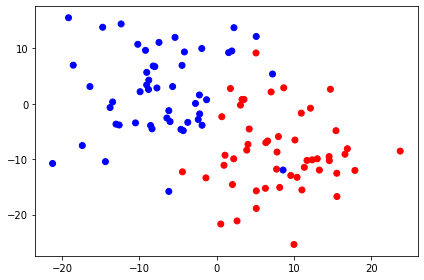

In [ ]:
# implementing make_blobs function to create a 2D dataset
nl_blob_classes = datasets.make_blobs(n_samples=n_samples, n_features=n_features, centers=2, cluster_std=7, random_state=52)

# initializing classes and labels
nl_blob_1 = nl_blob_classes[0][:, 0]    # class 1 of nl_blob_classes
nl_blob_2 = nl_blob_classes[0][:, 1]    # class 2 of nl_blob_classes
nl_blob_labels = nl_blob_classes[1]

plt.scatter(nl_blob_1, nl_blob_2, c=nl_blob_labels, cmap=cmap)
plt.tight_layout()
plt.show()

This dataset shows two clusters that overlap, making it difficult for a lineary boundary, thus making a logistic regression perform poorly compared to other nonlinear separable classifiers.

# **Machine Learning**

Now that the 4 datasets have been generated, I will begin fitting them onto each of the classification algorithms and evaluate them.

In [ ]:
### Modules Used for ML Classification ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions


The train_test_split function is required to split the four datasets into training and testing sets, that will be required to evaluate each of our ML models. Then lines 2-8 are the corresponding ML classifiers. Then I will be implementing the classification report as the evaluation metric for these models.

## <center> Train Test Split </center>

In [ ]:
# convert set of 2D data from the mentioned classes into list of tuples
dict_data = {"blob_classes": blob_classes, "circle_classes": circle_classes,
               "moons_classes": moons_classes, "nl_blob_classes": nl_blob_classes}


# takes in ML classifier and dict_data for evaluation.
# performs train/test/split on each data in dictionary data
# then fits ML model onto each data and evaluates train and test sets
def model_dataset_eval(classifier, data):
  
    # create a figure with subplots for each dataset
    fig = plt.figure(figsize=(5*len(data),6))

    # create a gridspec to control the layout of the subplots
    gs = fig.add_gridspec(2, len(data), height_ratios=[3, 1])

    # loop through the list of data tuples
    for i, (name, (X, y)) in enumerate(data.items()):

        # create the upper subplot for the decision boundary
        ax1 = fig.add_subplot(gs[0, i])
        ax1.set_title(f"{name} Decision Boundary and Regions", fontsize=14)

        # perform a train-test split on the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

        # fit the classifier on the training data
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Plot the decision boundary and regions for the dataset
        plot_decision_regions(X_test, y_test, clf=classifier, ax=ax1)

        # create the lower subplot for the classification report
        ax2 = fig.add_subplot(gs[1, i])
        ax2.text(0, 0.5, f"Classification report for {name}:\n{classification_report(y_test, y_pred)}", fontsize=12, verticalalignment='center')
        ax2.axis('off')

    plt.tight_layout()
    plt.show()
    

In order to reduce code redundancy, I defined a function that takes in the ML classifier and a list from a dictionary of each dataset that was synthesized. This function splits the data into training and testing sets with a test size of 20%. Then, it evaluates the training and testing sets of each model to examine performance of the model.
<br>
As mentioned, I will be using the classification report metric to evaluate each of the datasets for each of the 6 classification algorithms.

## <center> Naive Bayes Classification </center>

This model follows a p

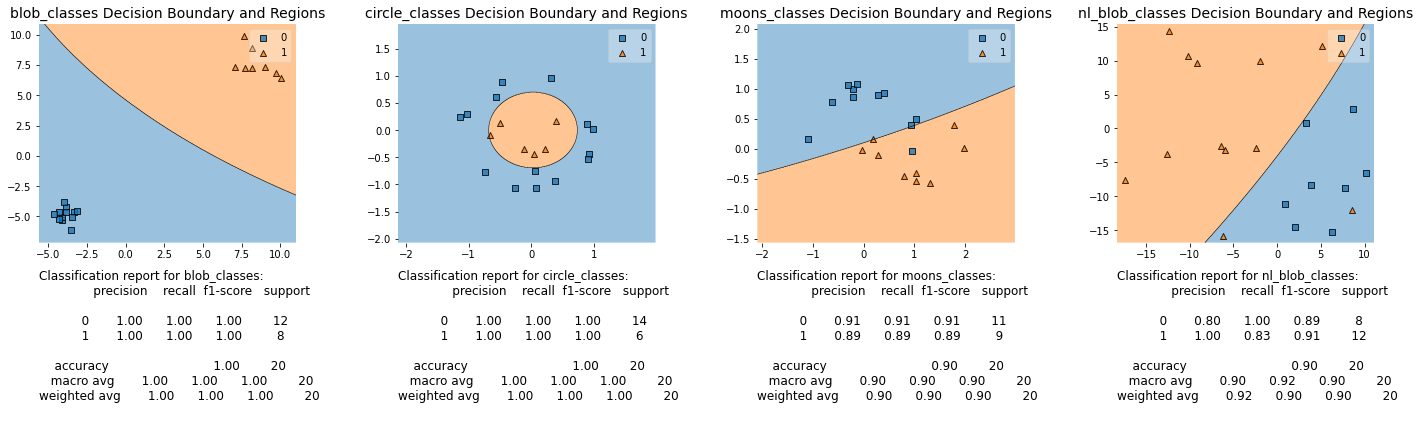

In [ ]:
# initializing the GaussianNB classifier
naive_bayes = GaussianNB()

model_dataset_eval(classifier=naive_bayes, data=dict_data)

As expected for blob_classes, the Naive Bayes algorithm scored 100% for both precision and recall because the clusters were clear and linearly separable.
<br>
This model performs better for class 0 over class 1 since the recall is significantly higher.
<br>
For moons_classes, we can tell this model performs much poorly for the dataset, as the total accuracy was 85%, with a low recall for class 0 and decent precision scores for both classes. One assumption that this model does not perform well is because the classifier requires that features be independent of each other. However in the moons_classes dataset, the features are indeed dependent and so this violates the Naive Bayes criteron.
<br>
For nl_blob_classes, the model perform better with class 1 over 0, but still perform well overall with a 95% accuracy.


## <center> Logistic Regression </center>

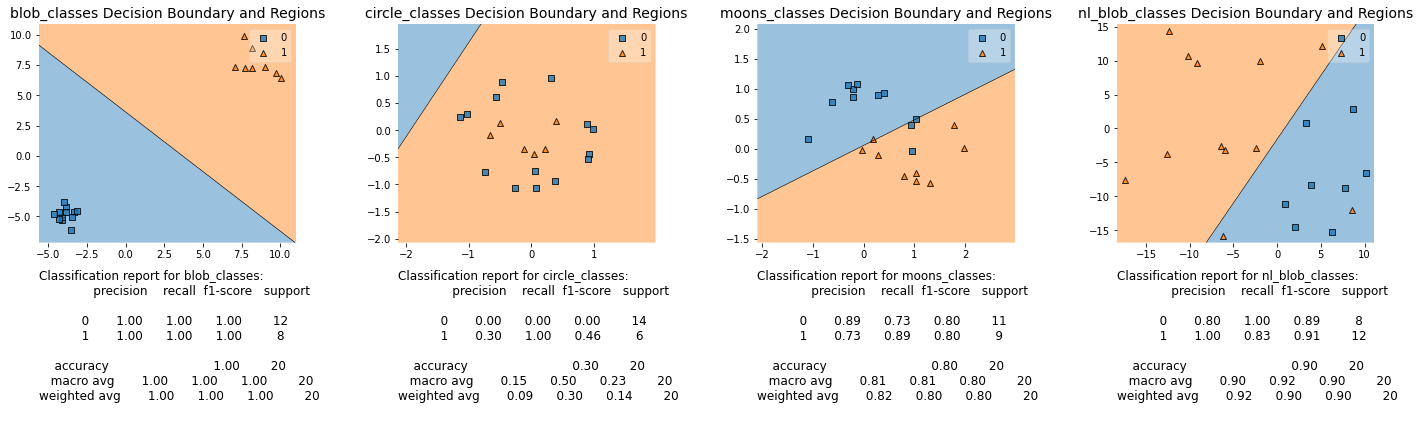

In [ ]:
# logistic regressison classifier
logreg = LogisticRegression()

model_dataset_eval(classifier=logreg, data=dict_data)

This model performs perfectly for blob_classes.
<br>
Immediately we can tell that the logistic regression model fails miserably for circle_classes, as expected. Because logistic regression typically fit linearly separable datasets, for a highly nonlinear dataset, this model performs very poorly with a total accuracy of 20%, and not being able to classify any data from class 1.
<br>
For moons_classes, this model certainly performs significantly better than the previous, but with semi-decent precision and recall scores. The model can somewhat misclassify both features at an equal rate.
<br>
For nl_blob_classes, this model performs relatively well, while classifying class 1 just a margin over class 0.

## <center> Quadratic Discriminant Analysis </center>

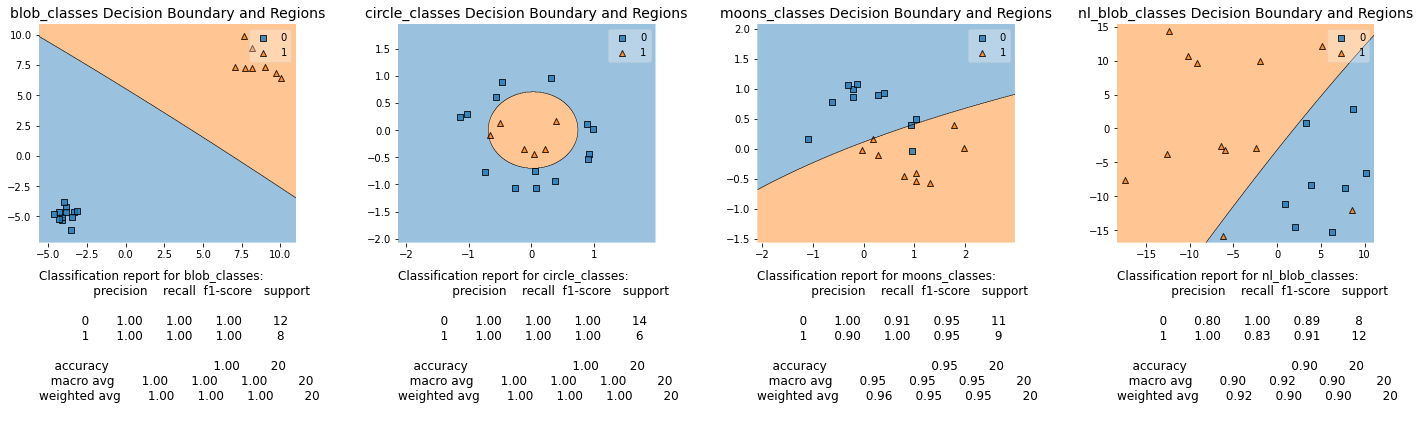

In [ ]:
# QDA classifier
qda = QuadraticDiscriminantAnalysis()

model_dataset_eval(classifier=qda, data=dict_data)

Overall, the results show that QDA is highly accurate when classifying linearly separable datasets, achieving a perfect score for make_blobs. 
For the more complex datasets like circle_classes and moons_classes, QDA still performs reasonably well.

For nl_blob_classes, QDA achieves an accuracy of 0.90, suggesting that it can still provide useful classification results in such cases. These results highlight the versatility of QDA for classification tasks across a range of synthetic datasets.

## <center> Support Vector Machine </center>

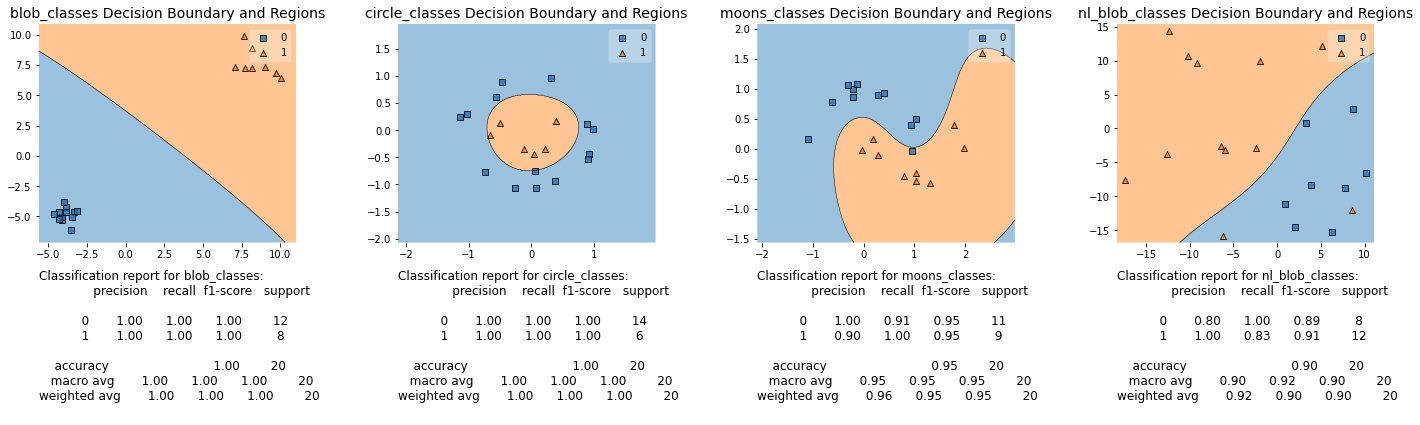

In [ ]:
# SVM classifier using RBF kernel
svc_rbf = SVC(kernel='rbf')

model_dataset_eval(classifier=svc_rbf, data=dict_data)

Overall, the results show that the SVM algorithm performs well on all four synthetic datasets

For the more complex datasets, the SVM algorithm still performs reasonably well. These results highlight the effectiveness of SVM for classification tasks across a range of synthetic datasets, demonstrating its ability to handle both linearly separable and non-linearly separable data.

## <center> Decision Tree </center>

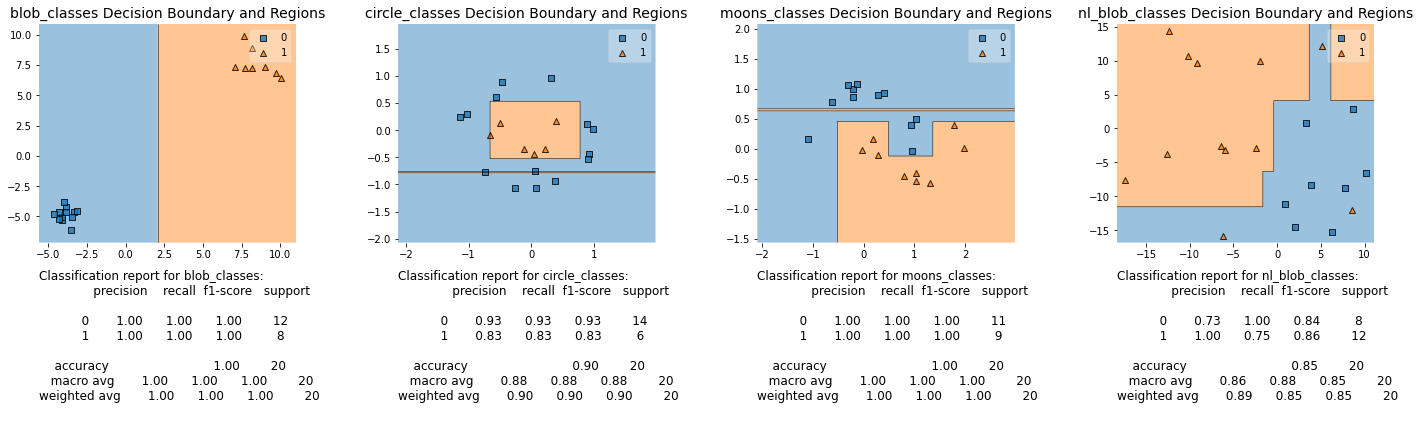

In [ ]:
# decision tree classifier
decision_tree = DecisionTreeClassifier()

model_dataset_eval(classifier=decision_tree, data=dict_data)

Overall, the results show that the decision tree algorithm performs well on all four synthetic datasets, including blob_classes, circle_classes, moons_classes, and nl_blob_classes

For the more complex datasets, the decision tree algorithm still performs reasonably well, achieving accuracy scores of 0.90, 1.0, and 0.85 for circle_classes, moons_classes, and nl_blob_classes, respectively.

These results highlight the effectiveness of the decision tree algorithm for classification tasks across a range of synthetic datasets, demonstrating its ability to handle both linearly separable and non-linearly separable data.

## <center> KNN </center>

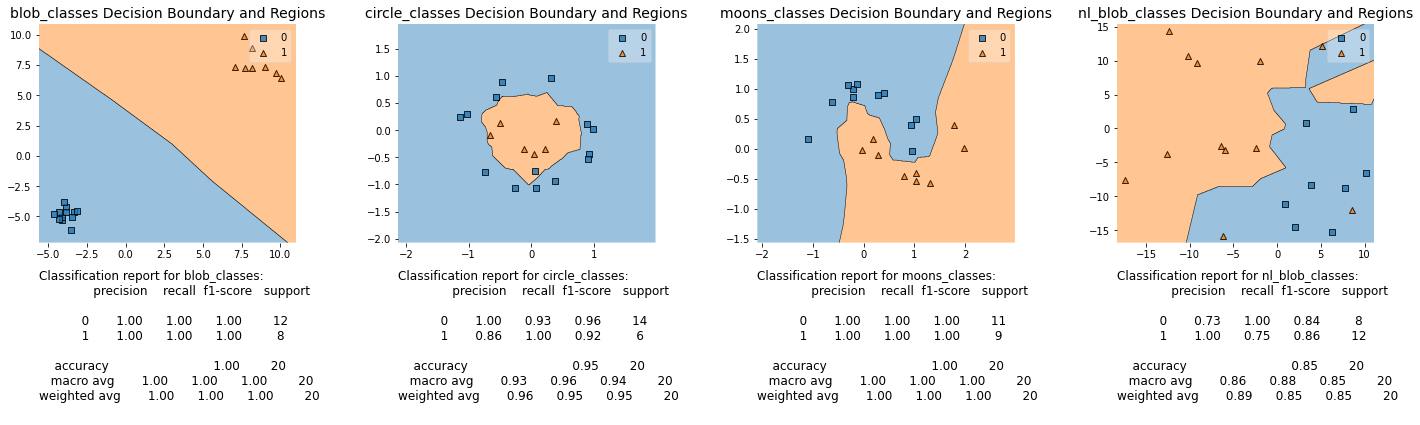

In [ ]:
# KNN with k=1
knn = KNN(n_neighbors=1)

model_dataset_eval(classifier=knn, data=dict_data)

Overall, the results show that the KNN algorithm performs well on all four synthetic datasets, including blob_classes, circle_classes, moons_classes, and nl_blob_classes.

In Dataset 1, which features two clear clusters that are linearly separable (blob_classes), the KNN algorithm achieves a perfect accuracy score when k=1. For the more complex datasets, the KNN algorithm still performs reasonably well, achieving accuracy scores of 0.92, 1.0, and 0.85 for circle_classes, moons_classes, and nl_blob_classes, respectively when k=1.

These results highlight the effectiveness of the KNN algorithm for classification tasks across a range of synthetic datasets, demonstrating its ability to handle both linearly separable and non-linearly separable data.